Data Wrangling II operations using Python. (e.g., Academic_Performance.csv)
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them(using mean
and mode).Apply for single column and whole dataset.
2. Scan all numeric variables for outliers. If there are outliers,any of the suitable
techniques to deal with them.(using z score)
3. Display and Remove the outliers
4. Apply data transformations on at least one of the variables Create bins and Labels.
5. Draw box plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Niraj More\OneDrive\Desktop\DSBDA\Practice\PR_EXAM_DATASET\AcademicPerformance_New.csv")

In [3]:
df

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [4]:
# plt.boxplot(df['Roll No'])
# plt.show()

# # Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using mean and mode).Apply for single column and whole dataset.

In [5]:
df.isnull().sum()

Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [6]:
df.dtypes

Roll No        float64
NationalITy     object
WT             float64
DSBDA          float64
AI             float64
Average        float64
Grade           object
PG              object
dtype: object

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [8]:
df.isnull().sum()

Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64

## Scan all numeric variables for outliers. If there are outliers,any of the suitable techniques to deal with them.(using z score)

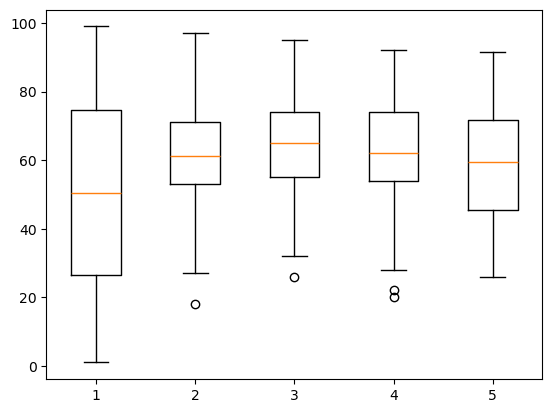

In [9]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Draw box plot before removing outliers

plt.boxplot(df[numeric_columns])


plt.show()

In [10]:
z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())
outliers = df[(z_scores > 2).any(axis=1)]
df = df.drop(outliers.index)
outliers.index

Index([6, 17, 34, 59, 76, 91], dtype='int64')

In [11]:
df

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.000000,India,72.000000,72.000000,74.000000,72.666667,C,Yes
1,2.000000,Japan,69.000000,90.000000,62.235955,53.000000,B,No
2,50.479592,USA,61.164835,64.652632,62.235955,58.663265,D,No
3,4.000000,China,47.000000,64.652632,44.000000,30.333333,D,Yes
4,5.000000,India,76.000000,78.000000,62.235955,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.000000,USA,79.000000,64.652632,62.235955,26.333333,A,No
95,96.000000,Japan,78.000000,81.000000,82.000000,80.333333,A,No
96,97.000000,USA,65.000000,66.000000,62.000000,64.333333,B,No
97,98.000000,Rassia,63.000000,72.000000,70.000000,68.333333,B,Yes


## Display and Remove the outliers

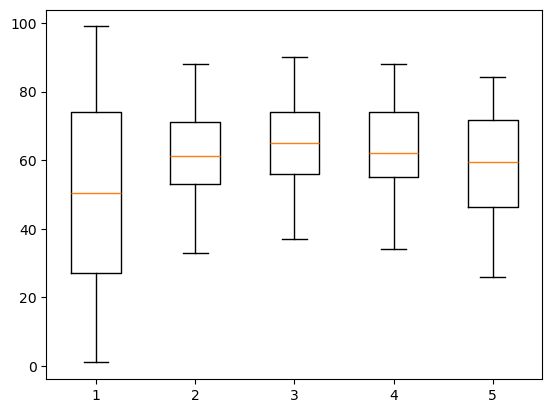

In [12]:
# Draw box plot after removing outliers

plt.boxplot(df[numeric_columns])


plt.show()

## Apply data transformations on at least one of the variables Create bins and Labels.

In [13]:
bins = [0, 40, 60, 80, 100]
labels = ['Low', 'Average', 'Good', 'Excellent']
df['Averages'] = pd.cut(df['WT'], bins=bins, labels=labels)

In [14]:
df

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,Averages
0,1.000000,India,72.000000,72.000000,74.000000,72.666667,C,Yes,Good
1,2.000000,Japan,69.000000,90.000000,62.235955,53.000000,B,No,Good
2,50.479592,USA,61.164835,64.652632,62.235955,58.663265,D,No,Good
3,4.000000,China,47.000000,64.652632,44.000000,30.333333,D,Yes,Average
4,5.000000,India,76.000000,78.000000,62.235955,51.333333,C,No,Good
...,...,...,...,...,...,...,...,...,...
94,95.000000,USA,79.000000,64.652632,62.235955,26.333333,A,No,Good
95,96.000000,Japan,78.000000,81.000000,82.000000,80.333333,A,No,Good
96,97.000000,USA,65.000000,66.000000,62.000000,64.333333,B,No,Good
97,98.000000,Rassia,63.000000,72.000000,70.000000,68.333333,B,Yes,Good


## Scan all numeric variables for outliers. If there are outliers,any of the suitable 
techniques to deal with them.(using IQR)

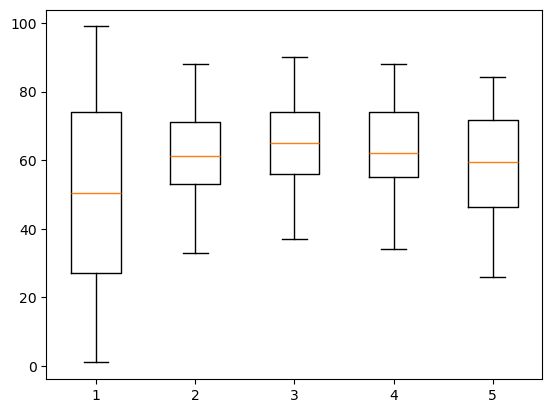

In [15]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.boxplot(df[numeric_columns])
plt.show()

In [16]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate quartiles and IQR
q1 = df[numeric_columns].quantile(0.25)
q3 = df[numeric_columns].quantile(0.75)
iqr = q3 - q1

# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 +  1.5* iqr

# Detect outliers using IQR method
outliers = df[(df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)]

# Print the outliers
print("Outliers detected using IQR method:")
df_cleaned = df.drop(outliers.index)
outliers.index


Outliers detected using IQR method:


Index([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95,
       96, 97, 98],
      dtype='int64')

In [22]:
df_cleaned

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,Averages


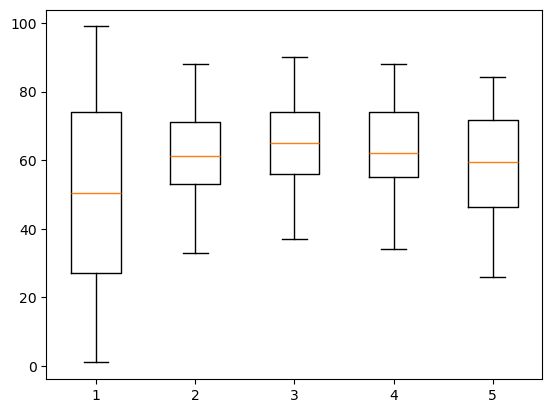

In [17]:

plt.boxplot(df[numeric_columns])
plt.show()

In [18]:
q1


Roll No    27.000000
WT         53.000000
DSBDA      56.000000
AI         55.000000
Average    46.333333
Name: 0.25, dtype: float64

In [19]:
q3

Roll No    74.000000
WT         71.000000
DSBDA      74.000000
AI         74.000000
Average    71.666667
Name: 0.75, dtype: float64

In [20]:
iqr

Roll No    47.000000
WT         18.000000
DSBDA      18.000000
AI         19.000000
Average    25.333333
dtype: float64

Aggregated Data:
       WT    Average
max  88.0  84.333333
min  33.0  26.000000


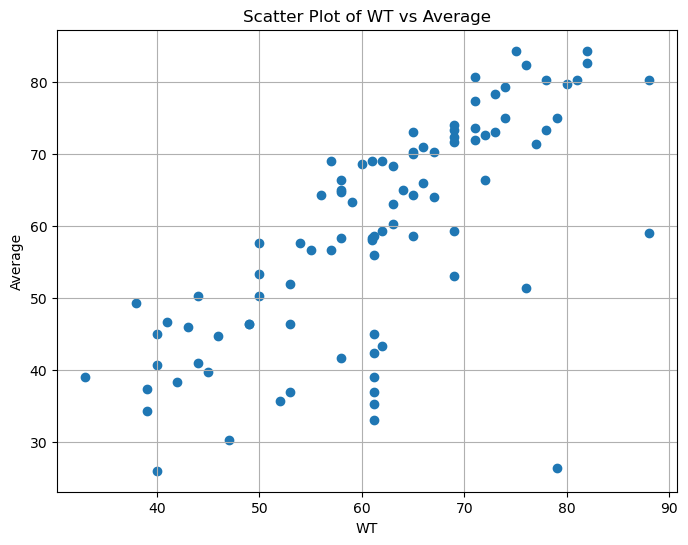

In [21]:
agg =df.agg({'WT':['max','min'],
            'Average':['max','min']})

# Print aggregated data
print("Aggregated Data:")
print(agg)

# Draw scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['WT'], df['Average'])
plt.title('Scatter Plot of WT vs Average')
plt.xlabel('WT')
plt.ylabel('Average')
plt.grid(True)
plt.show()